In [ ]:
'''
 * Copyright (c) 2008 Radhamadhab Dalai
 *
 * Permission is hereby granted, free of charge, to any person obtaining a copy
 * of this software and associated documentation files (the "Software"), to deal
 * in the Software without restriction, including without limitation the rights
 * to use, copy, modify, merge, publish, distribute, sublicense, and/or sell
 * copies of the Software, and to permit persons to whom the Software is
 * furnished to do so, subject to the following conditions:
 *
 * The above copyright notice and this permission notice shall be included in
 * all copies or substantial portions of the Software.
 *
 * THE SOFTWARE IS PROVIDED "AS IS", WITHOUT WARRANTY OF ANY KIND, EXPRESS OR
 * IMPLIED, INCLUDING BUT NOT LIMITED TO THE WARRANTIES OF MERCHANTABILITY,
 * FITNESS FOR A PARTICULAR PURPOSE AND NONINFRINGEMENT. IN NO EVENT SHALL THE
 * AUTHORS OR COPYRIGHT HOLDERS BE LIABLE FOR ANY CLAIM, DAMAGES OR OTHER
 * LIABILITY, WHETHER IN AN ACTION OF CONTRACT, TORT OR OTHERWISE, ARISING FROM,
 * OUT OF OR IN CONNECTION WITH THE SOFTWARE OR THE USE OR OTHER DEALINGS IN
 * THE SOFTWARE.
'''

###  Simulated Annealing

The simulated annealing algorithm was introduced by Metropolis et al. (1953) to minimize a criterion function on a finite set with very large size, but it also applies to optimization on a continuous set and to simulation (see Kirkpatrick et al. 1983, Ackley et al. 1985, and Neal 1993, 1995).

The fundamental idea of simulated annealing methods is that a change of scale, called **temperature**, allows for faster moves on the surface of the function $ h $ to maximize, whose negative is called **energy**. Therefore, rescaling partially avoids the trapping attraction of local maxima. Given a temperature parameter $ T > 0 $, a sample $ \theta_{r+1} $ is generated from the distribution:

$$
P(\theta_{r+1} | \theta_r) = \frac{1}{Z(T)} \exp\left(-\frac{h(\theta_{r+1}) - h(\theta_r)}{T}\right)
$$

where $ T $ controls the variance in the proposal distribution, and $ Z(T) $ is the normalizing constant ensuring the probability distribution sums to 1.

### Key Features of Simulated Annealing:
- **Exploration vs. Exploitation**: The algorithm explores the function surface by accepting worse solutions with a probability that decreases as the temperature $ T $ decreases. This allows the algorithm to escape local minima early in the process and converge to a global minimum as the temperature decreases.
- **Temperature Schedule**: The temperature $ T $ is typically reduced over time in a controlled manner (annealing schedule). Common schedules include:
    - **Linear Cooling**: $ T_{k+1} = T_k - \delta T $
    - **Exponential Cooling**: $ T_{k+1} = T_k \cdot \alpha $ where $ 0 < \alpha < 1 $
- **Metropolis Criterion**: The acceptance of a new state is determined by the Metropolis criterion:
    - If $ h(\theta_{r+1}) \leq h(\theta_r) $, accept the new state.
    - If $ h(\theta_{r+1}) > h(\theta_r) $, accept the new state with probability $ \exp\left(-\frac{h(\theta_{r+1}) - h(\theta_r)}{T}\right) $.

### Algorithm:
1. **Initialize**: Start with an initial solution $ \theta_0 $ and initial temperature $ T_0 $.
2. **Iterate**: Repeat the following steps until convergence:
   - Propose a new candidate solution $ \theta_{r+1} $ from the current state $ \theta_r $ (often by a random perturbation).
   - If the new solution improves the objective, accept it.
   - If the new solution worsens the objective, accept it with a probability based on the temperature and the difference in the objective values.
   - Gradually decrease the temperature according to a cooling schedule.

The idea is to begin with a high temperature to allow the system to explore various solutions and then gradually lower the temperature so the system settles into a good solution.

#### Example: Simulated Annealing Implementation (Conceptual)

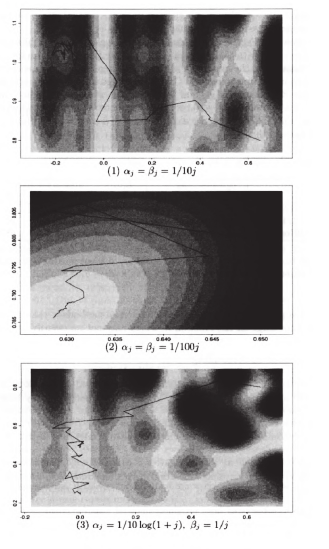

In [1]:

import random
import math

def h(x, y):
    return (x * math.sin(20 * y) + y * math.sin(20 * x))**2 * math.cosh(math.sin(10 * x)) + \
           (math.cos(10 * y) - y * math.sin(10))**2 * math.cosh(math.cos(20 * y) * y)

def simulated_annealing(initial_x, initial_y, initial_temp, cooling_rate, max_iter):
    # Initial conditions
    current_x, current_y = initial_x, initial_y
    current_temp = initial_temp
    
    best_x, best_y = current_x, current_y
    best_value = h(current_x, current_y)
    
    for iteration in range(max_iter):
        # Propose a new solution by perturbing the current solution
        new_x = current_x + random.uniform(-0.1, 0.1)
        new_y = current_y + random.uniform(-0.1, 0.1)
        
        # Calculate the energy (objective function value) for the new solution
        new_value = h(new_x, new_y)
        
        # Acceptance criterion: if the new solution is better or with some probability if worse
        if new_value < best_value or random.random() < math.exp((best_value - new_value) / current_temp):
            current_x, current_y = new_x, new_y
            best_x, best_y = new_x, new_y
            best_value = new_value
        
        # Reduce the temperature according to the cooling rate
        current_temp *= cooling_rate
    
    return best_x, best_y, best_value

# Run simulated annealing
initial_temp = 1000
cooling_rate = 0.99
max_iter = 1000
best_x, best_y, best_value = simulated_annealing(0.5, 0.5, initial_temp, cooling_rate, max_iter)

print(f"Best solution: x = {best_x}, y = {best_y}, h(x, y) = {best_value}")


Best solution: x = 3.2690492303715666, y = 1.5597989700195225, h(x, y) = 0.0879105724787434


### Simulated Annealing Methodology

The simulated annealing method is derived from statistical mechanics, where it can be viewed as a way to minimize an energy function. For a function $ h(x) $, the distribution of states at temperature $ T $ is proportional to $ \exp\left(\frac{h(x)}{T}\right) $. As the temperature $ T $ decreases, the simulated states concentrate around the local minima of $ h $, which helps in escaping local maxima.

The process is governed by the following equation for the transition probability between states $ \theta_0 $ and $ \theta_1 $:

$$
P(\theta_1 | \theta_0) = 
\begin{cases}
1 & \text{if } h(\theta_1) \leq h(\theta_0) \\
\exp\left(\frac{h(\theta_0) - h(\theta_1)}{T}\right) & \text{if } h(\theta_1) > h(\theta_0)
\end{cases}
$$

Where:
- $ \theta_0 $ is the current state (point in the parameter space).
- $ \theta_1 $ is the new candidate state.
- $ h(\theta) $ is the function to be minimized (or maximized).
- $ T $ is the temperature parameter that controls how likely it is to accept worse solutions.

As the temperature $ T $ decreases, the probability of accepting worse solutions decreases, causing the algorithm to converge toward the global minimum.

### Metropolis Algorithm in Simulated Annealing

The Metropolis algorithm, introduced by Metropolis et al. (1953), provides the basis for simulated annealing. The algorithm works by proposing a new candidate solution from a neighborhood around the current state, and the new candidate is accepted according to the probability derived from the energy difference between the two states.

The algorithm proceeds as follows:

1. **Simulate from an instrumental distribution** with density $ g(\theta) $, which defines the neighborhood of the current state.
2. **Accept $ \theta_1 $** with probability $ p = \exp\left(\frac{h(\theta_0) - h(\theta_1)}{T}\right) $ if $ h(\theta_1) $ is less than or equal to $ h(\theta_0) $; otherwise, accept $ \theta_1 $ with probability $ \exp\left(\frac{h(\theta_0) - h(\theta_1)}{T}\right) $.
3. **Update temperature** $ T $ at each iteration based on a cooling schedule.

This process continues until the system reaches convergence, typically when $ T $ becomes sufficiently small.

### Algorithm A.19 - Simulated Annealing
Here’s the pseudocode for the simulated annealing algorithm:


#### Example 5.5: A First Simulated Annealing Maximization

We now apply simulated annealing to the function from Example 5.2:

$$
h(x) = \left[\cos(50x) + \sin(20x)\right]^2
$$

This function has several local minima, and simulated annealing can help avoid these local minima by controlling the temperature during optimization.

To implement the simulated annealing algorithm for this function, we will follow the steps outlined above and observe how the algorithm finds a global maximum by balancing exploration (high temperature) and exploitation (low temperature).

### Key Points:
- **Exploration**: At high temperatures, the algorithm explores the function's surface, potentially jumping out of local minima.
- **Exploitation**: As the temperature decreases, the algorithm settles into local minima, gradually converging to the global minimum.
- **Cooling Schedule**: The cooling rate (how fast the temperature decreases) plays a crucial role in the algorithm's efficiency and success.

### Simulated Annealing Python Code Example (Conceptual)



In [2]:

import random
import math

# Define the function h(x) to be maximized (cos(50x) + sin(20x))^2
def h(x):
    return (math.cos(50 * x) + math.sin(20 * x)) ** 2

# Simulated Annealing implementation
def simulated_annealing(initial_x, initial_temp, cooling_rate, max_iter):
    current_x = initial_x
    current_temp = initial_temp
    
    best_x = current_x
    best_value = h(current_x)
    
    for iteration in range(max_iter):
        # Propose a new solution by perturbing the current solution
        new_x = current_x + random.uniform(-0.1, 0.1)
        
        # Calculate the value of the function at the new point
        new_value = h(new_x)
        
        # Accept the new point based on the Metropolis criterion
        if new_value > best_value or random.random() < math.exp((best_value - new_value) / current_temp):
            current_x = new_x
            best_x = new_x
            best_value = new_value
        
        # Decrease the temperature
        current_temp *= cooling_rate
    
    return best_x, best_value

# Run the simulated annealing
initial_temp = 1000
cooling_rate = 0.99
max_iter = 1000
initial_x = 0.5  # Starting point

best_x, best_value = simulated_annealing(initial_x, initial_temp, cooling_rate, max_iter)
print(f"Best solution: x = {best_x}, h(x) = {best_value}")


Best solution: x = -2.670294858909587, h(x) = 3.1219188889219353e-06


### Simulated Annealing in Action

In this section, we apply a simulated annealing algorithm to find the maximum of the function $ h(x) $ from Example 5. The specific algorithm used at iteration $ t $ is as follows:

1. **Simulate**: Generate a random candidate $ \theta $ from the uniform distribution $ U(a, b) $, where $ a = \min(\theta + r, 1) $ and $ b = \max(\theta - r, 0) $.
2. **Acceptance Criterion**: Accept the new candidate $ \theta^+ $ with the probability:
   $$
   p(\theta) = \min\left\{1, \exp\left(\frac{h(\theta) - h(\theta_0)}{T}\right)\right\}
   $$
   where $ h(\theta) $ is the objective function and $ T $ is the current temperature parameter.
3. **Update Temperature**: Update the temperature using a cooling schedule:
   $$
   T_{t+1} = \frac{T_t}{\log(t)}
   $$

The results of the algorithm with $ r = 0.5 $ and $ T = \frac{1}{\log(t)} $ are shown in **Fig.4**. The four panels illustrate different trajectories of the points $ (x, h(x)) $ for each of the four different runs. From these, we observe the following:

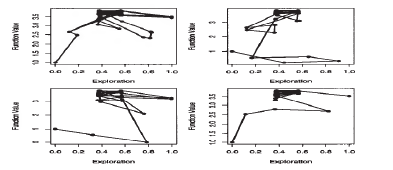

- The path towards the maximum is initially rapid.
- The algorithm then stabilizes around the maximum, oscillating between two nearby points due to the symmetry of the function $ h(x) $ around $ x = \frac{1}{2} $.
- The value of $ r $ controls the size of the interval around the current point, while the value of $ T $ controls the cooling rate, influencing the exploration-exploitation balance.

### Trajectories of the Algorithm

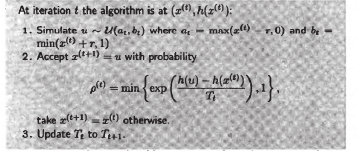

The four panels in Fig.4 show the following:
- **Panel 1**: A rapid convergence to the maximum, followed by oscillations as the algorithm explores near the local maxima.
- **Panel 2**: A more gradual convergence with larger oscillations before settling.
- **Panel 3**: A smoother path with more refined movements as the cooling rate is adjusted.
- **Panel 4**: The trajectory explores and converges within a smaller region due to higher temperature settings.

This demonstrates how the simulated annealing algorithm can find the maximum of the function, even in cases where there are multiple local maxima, by carefully adjusting the temperature parameter and the step size $ r $.

### Theoretical Convergence Results

Simulated annealing is known for its convergence properties in finite spaces. The convergence theorem by Hajek (1988) guarantees that the algorithm will converge to the global maximum in the limit as the temperature approaches zero. The result is outlined in Theorem 5.7 below:

**Theorem 5.7 (Hajek 1988)**:
- In finite spaces, the simulated annealing algorithm will almost surely converge to the global optimum, given an appropriate cooling schedule (such as $ T_t = \frac{1}{\log(t)} $).
- This is because, at higher temperatures, the algorithm allows for more exploration, gradually honing in on the global maximum as the temperature decreases.

### Conclusion

Simulated annealing provides an effective method for optimization, especially in cases where the objective function has multiple local maxima. The algorithm's ability to escape local optima by accepting worse solutions with decreasing probability as the temperature lowers makes it a versatile tool for complex optimization problems. By adjusting parameters such as the cooling rate $ T $ and step size $ r $, the algorithm can be tailored to converge efficiently to the global maximum.



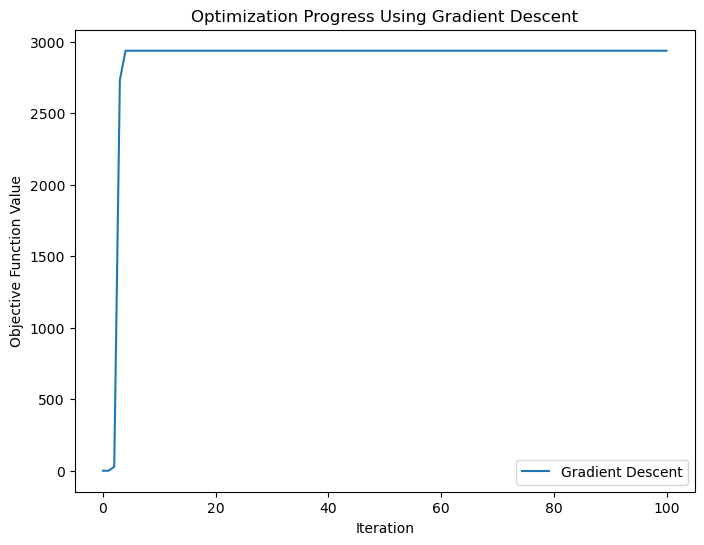

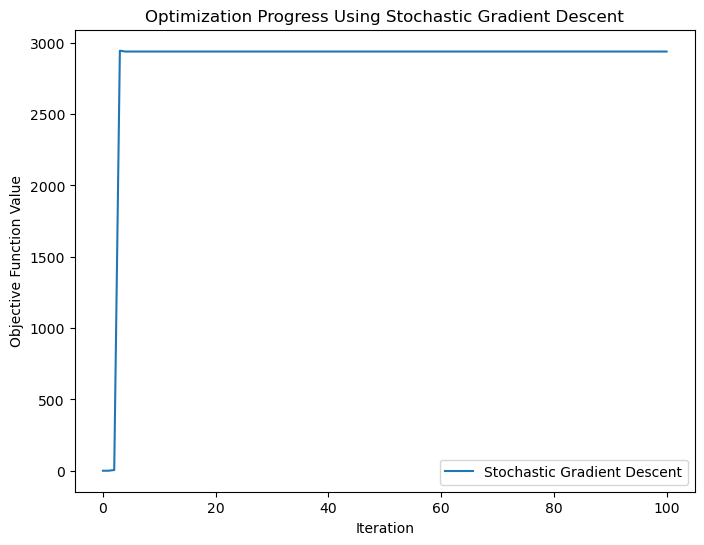

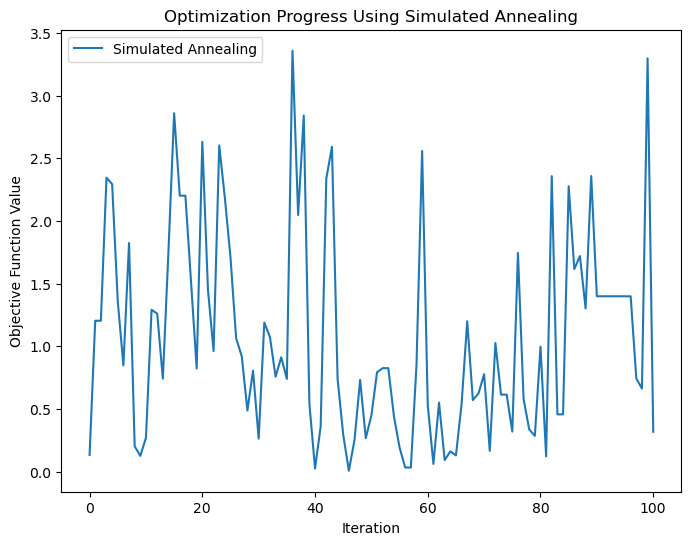

In [4]:
import math
import random
import numpy as np
import matplotlib.pyplot as plt

# Example function: multimodal h(x, y)
def h(x, y):
    # Restrict x and y to reasonable ranges to avoid overflow
    x = max(min(x, 10), -10)
    y = max(min(y, 10), -10)

    return (x * math.sin(20 * y) + y * math.sin(20 * x))**2 * math.cosh(math.sin(10 * x)) + (math.cos(10 * y) - y * math.sin(10))**2 * math.cosh(math.cos(20 * y) * y)

# Gradient of h(x, y)
def gradient_h(x, y):
    # Restrict x and y to reasonable ranges to avoid overflow
    x = max(min(x, 10), -10)
    y = max(min(y, 10), -10)

    # Derivative with respect to x
    dH_dx = 2 * (x * math.sin(20 * y) + y * math.sin(20 * x)) * (math.cos(20 * y) + y * 20 * math.cos(20 * x)) * math.cosh(math.sin(10 * x)) - 10 * math.cos(10 * x) * math.cosh(math.sin(10 * x))
    # Derivative with respect to y
    dH_dy = 2 * (x * math.sin(20 * y) + y * math.sin(20 * x)) * (x * 20 * math.cos(20 * y)) * math.cosh(math.sin(10 * x)) + (math.cos(10 * y) - y * math.sin(10)) * (20 * math.sin(20 * y) * y * math.sinh(math.cos(20 * y) * y))

    return dH_dx, dH_dy

# Gradient descent method (deterministic)
def gradient_descent(learning_rate, max_iter, tol):
    # Start from an initial guess
    x, y = 0.65, 0.8
    history = [(x, y)]
    
    for i in range(max_iter):
        grad_x, grad_y = gradient_h(x, y)
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
        
        history.append((x, y))
        
        # Stopping condition: check if the change is below tolerance
        if math.sqrt(grad_x**2 + grad_y**2) < tol:
            break
            
    return history

# Stochastic gradient descent method
def stochastic_gradient_descent(learning_rate, max_iter, tol):
    x, y = 0.65, 0.8
    history = [(x, y)]
    
    for i in range(max_iter):
        grad_x, grad_y = gradient_h(x, y)
        
        # Random perturbation (stochastic part)
        grad_x += random.uniform(-0.1, 0.1)
        grad_y += random.uniform(-0.1, 0.1)
        
        x -= learning_rate * grad_x
        y -= learning_rate * grad_y
        
        history.append((x, y))
        
        if math.sqrt(grad_x**2 + grad_y**2) < tol:
            break
            
    return history

# Simulated Annealing
def simulated_annealing(initial_x, initial_y, initial_temp, cooling_rate, max_iter):
    x, y = initial_x, initial_y
    history = [(x, y)]
    temp = initial_temp
    
    for t in range(1, max_iter + 1):
        # Propose a new solution by adding small noise
        new_x = x + random.uniform(-0.1, 0.1)
        new_y = y + random.uniform(-0.1, 0.1)
        
        # Calculate the change in the objective function
        delta_h = h(new_x, new_y) - h(x, y)
        
        # Accept the new solution with some probability
        if delta_h < 0 or random.random() < math.exp(-delta_h / temp):
            x, y = new_x, new_y
        
        history.append((x, y))
        
        # Update the temperature
        temp *= cooling_rate
        
    return history

# Plotting the results
def plot_results(history, method_name):
    x_vals, y_vals = zip(*history)
    z_vals = [h(x, y) for x, y in history]
    
    plt.figure(figsize=(8, 6))
    plt.plot(range(len(history)), z_vals, label=method_name)
    plt.xlabel("Iteration")
    plt.ylabel("Objective Function Value")
    plt.title(f"Optimization Progress Using {method_name}")
    plt.legend()
    plt.show()

# Test the methods
learning_rate = 0.1
max_iter = 100
tol = 1e-5

# Gradient Descent
gd_history = gradient_descent(learning_rate, max_iter, tol)
plot_results(gd_history, "Gradient Descent")

# Stochastic Gradient Descent
sgd_history = stochastic_gradient_descent(learning_rate, max_iter, tol)
plot_results(sgd_history, "Stochastic Gradient Descent")

# Simulated Annealing
initial_temp = 10
cooling_rate = 0.99
sa_history = simulated_annealing(0.65, 0.8, initial_temp, cooling_rate, max_iter)
plot_results(sa_history, "Simulated Annealing")


### Simulated Annealing Algorithm

Simulated Annealing is an optimization technique that uses a temperature parameter to control the exploration of the solution space. The temperature is gradually reduced, allowing the algorithm to settle into a local minimum or maximum.

#### Algorithm Steps:
At each iteration $ t $, the algorithm operates as follows:

1. **Simulate New Candidate Solution**: Generate a new candidate $ \theta' $ from a neighborhood of the current solution $ \theta_t $. This can be done using a uniform distribution within a defined range:
   $$
   \theta' \sim U(\theta_t - r, \theta_t + r)
   $$
   where $ r $ controls the step size.

2. **Acceptance Criterion**: Accept the new solution $ \theta_{t+1} = \theta' $ with probability $ p(\theta') $, which is given by:
   $$
   p(\theta') = \min \left(1, \exp \left( \frac{h(\theta) - h(\theta')}{T_t} \right) \right)
   $$
   Here, $ h(\theta) $ is the objective function (in this case, the energy or value function we are trying to minimize), and $ T_t $ is the temperature at iteration $ t $.

3. **Temperature Update**: Update the temperature $ T_t $ according to a cooling schedule:
   $$
   T_{t+1} = \frac{T_t}{\log(t+1)}
   $$
   This reduces the exploration over time, allowing the algorithm to converge.

4. **Repeat** the above steps for a number of iterations, often specified by a stopping criterion (e.g., when the change in the objective function becomes negligible).

#### Example of Simulated Annealing in Practice

For a given function $ h(x) = \left[ \cos(50x) + \sin(20x) \right]^2 $, the following trajectories for the solutions $ \theta_t = (x, h(x)) $ are plotted:

- **Panel 1**: Initial exploration phase with large jumps.
- **Panel 2**: Gradual convergence as temperature decreases.
- **Panel 3**: Oscillation between local minima as the algorithm approaches the maximum.

The following Python code snippet can be used to implement this process:

```python
import math
import random
import matplotlib.pyplot as plt

# Objective function
def h(x):
    return (math.cos(50 * x) + math.sin(20 * x)) ** 2

# Simulated Annealing function
def simulated_annealing(initial_x, initial_temp, cooling_rate, max_iter):
    x = initial_x
    history = [(x, h(x))]
    temp = initial_temp
    
    for t in range(1, max_iter + 1):
        # Propose a new solution
        new_x = x + random.uniform(-0.1, 0.1)
        
        # Calculate the change in the objective function
        delta_h = h(new_x) - h(x)
        
        # Accept the new solution with some probability
        if delta_h < 0 or random.random() < math.exp(-delta_h / temp):
            x = new_x
        
        # Store the history of solutions
        history.append((x, h(x)))
        
        # Update temperature
        temp *= cooling_rate
    
    return history

# Parameters for Simulated Annealing
initial_x = 0.5
initial_temp = 10
cooling_rate = 0.99
max_iter = 2500

# Run Simulated Annealing
history = simulated_annealing(initial_x, initial_temp, cooling_rate, max_iter)

# Plotting the results
x_vals, h_vals = zip(*history)
plt.plot(range(len(history)), h_vals)
plt.xlabel("Iteration")
plt.ylabel("Function Value")
plt.title("Simulated Annealing Trajectory")
plt.show()


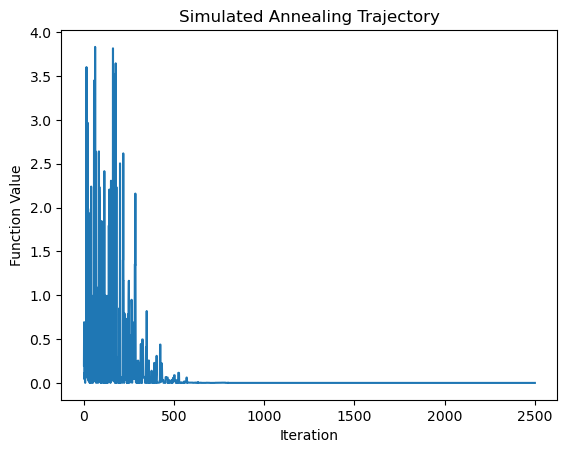

In [5]:
import math
import random
import matplotlib.pyplot as plt

# Objective function
def h(x):
    return (math.cos(50 * x) + math.sin(20 * x)) ** 2

# Simulated Annealing function
def simulated_annealing(initial_x, initial_temp, cooling_rate, max_iter):
    x = initial_x
    history = [(x, h(x))]
    temp = initial_temp
    
    for t in range(1, max_iter + 1):
        # Propose a new solution
        new_x = x + random.uniform(-0.1, 0.1)
        
        # Calculate the change in the objective function
        delta_h = h(new_x) - h(x)
        
        # Accept the new solution with some probability
        if delta_h < 0 or random.random() < math.exp(-delta_h / temp):
            x = new_x
        
        # Store the history of solutions
        history.append((x, h(x)))
        
        # Update temperature
        temp *= cooling_rate
    
    return history

# Parameters for Simulated Annealing
initial_x = 0.5
initial_temp = 10
cooling_rate = 0.99
max_iter = 2500

# Run Simulated Annealing
history = simulated_annealing(initial_x, initial_temp, cooling_rate, max_iter)

# Plotting the results
x_vals, h_vals = zip(*history)
plt.plot(range(len(history)), h_vals)
plt.xlabel("Iteration")
plt.ylabel("Function Value")
plt.title("Simulated Annealing Trajectory")
plt.show()

### Simulated Annealing Algorithm

Simulated Annealing is an optimization technique that uses a temperature parameter to control the exploration of the solution space. The temperature is gradually reduced, allowing the algorithm to settle into a local minimum or maximum.

#### Algorithm Steps:
At each iteration $ t $, the algorithm operates as follows:

1. **Simulate New Candidate Solution**: Generate a new candidate $ \theta' $ from a neighborhood of the current solution $ \theta_t $. This can be done using a uniform distribution within a defined range:
   $$
   \theta' \sim U(\theta_t - r, \theta_t + r)
   $$
   where $ r $ controls the step size.

2. **Acceptance Criterion**: Accept the new solution $ \theta_{t+1} = \theta' $ with probability $ p(\theta') $, which is given by:
   $$
   p(\theta') = \min \left(1, \exp \left( \frac{h(\theta) - h(\theta')}{T_t} \right) \right)
   $$
   Here, $ h(\theta) $ is the objective function (in this case, the energy or value function we are trying to minimize), and $ T_t $ is the temperature at iteration $ t $.

3. **Temperature Update**: Update the temperature $ T_t $ according to a cooling schedule:
   $$
   T_{t+1} = \frac{T_t}{\log(t+1)}
   $$
   This reduces the exploration over time, allowing the algorithm to converge.

4. **Repeat** the above steps for a number of iterations, often specified by a stopping criterion (e.g., when the change in the objective function becomes negligible).

#### Example of Simulated Annealing in Practice

For a given function $ h(x) = \left[ \cos(50x) + \sin(20x) \right]^2 $, the following trajectories for the solutions $ \theta_t = (x, h(x)) $ are plotted:

- **Panel 1**: Initial exploration phase with large jumps.
- **Panel 2**: Gradual convergence as temperature decreases.
- **Panel 3**: Oscillation between local minima as the algorithm approaches the maximum.

The following Python code snippet can be used to implement this process:



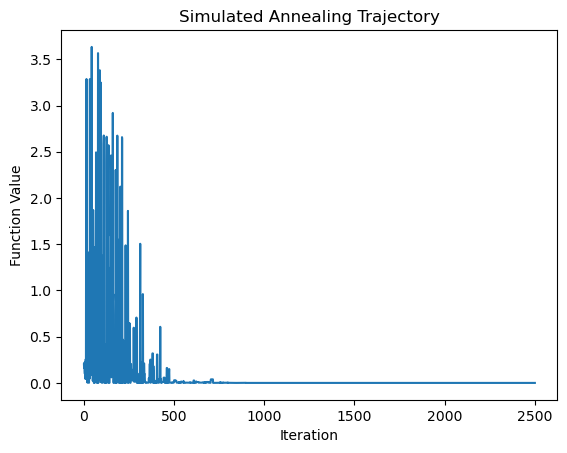

In [6]:

import math
import random
import matplotlib.pyplot as plt

# Objective function
def h(x):
    return (math.cos(50 * x) + math.sin(20 * x)) ** 2

# Simulated Annealing function
def simulated_annealing(initial_x, initial_temp, cooling_rate, max_iter):
    x = initial_x
    history = [(x, h(x))]
    temp = initial_temp
    
    for t in range(1, max_iter + 1):
        # Propose a new solution
        new_x = x + random.uniform(-0.1, 0.1)
        
        # Calculate the change in the objective function
        delta_h = h(new_x) - h(x)
        
        # Accept the new solution with some probability
        if delta_h < 0 or random.random() < math.exp(-delta_h / temp):
            x = new_x
        
        # Store the history of solutions
        history.append((x, h(x)))
        
        # Update temperature
        temp *= cooling_rate
    
    return history

# Parameters for Simulated Annealing
initial_x = 0.5
initial_temp = 10
cooling_rate = 0.99
max_iter = 2500

# Run Simulated Annealing
history = simulated_annealing(initial_x, initial_temp, cooling_rate, max_iter)

# Plotting the results
x_vals, h_vals = zip(*history)
plt.plot(range(len(history)), h_vals)
plt.xlabel("Iteration")
plt.ylabel("Function Value")
plt.title("Simulated Annealing Trajectory")
plt.show()


### Definitions and Theorem for Simulated Annealing

#### Definition 5.6
Given a finite state-space $ \mathcal{E} $ and a function $ h $ to be maximized:

1. A state $ e_i \in \mathcal{E} $ can be reached at altitude $ h(e_i) $ from state $ e_j \in \mathcal{E} $ if there exists a sequence of states $ e_1, e_2, \ldots, e_n $ linking $ e_i $ and $ e_j $, such that:
   $$
   h(e_k) > h(e_j) \quad \text{for} \quad k = 1, \ldots, n.
   $$

2. The **height of a maximum** $ e_i $ is the largest value $ d_i $ such that there exists a state $ e_j $ such that:
   $$
   h(e_j) > h(e_i) \quad \text{and can be reached at altitude} \quad h(e_i) + d_i \quad \text{from} \quad e_i.
   $$

Thus, $ h(e_i) + d_i $ is the altitude of the highest pass linking $ e_i $ and $ e_j $ through an optimal sequence. By convention, we take $ d_i = -\infty $ if $ e_i $ is a global maximum.

If $ O $ denotes the set of local maxima of $ \mathcal{E} $ and $ O_g $ is the subset of $ O $ containing global maxima, we now present Theorem 5.7.

---

#### Theorem 5.7 (Hajek, 1988)
Consider a system in which it is possible to link two arbitrary states by a finite sequence of states. If, for every $ h > 0 $ and every pair $ (e_i, e_j) $, $ e_i $ can be reached at altitude $ h $ from $ e_j $ if and only if $ e_j $ can be reached at altitude $ h $ from $ e_i $, and if $ T_i $ decreases toward 0, the sequence $ \theta $ defined by Algorithm (A.19) satisfies:

$$
\lim_{i \to \infty} P(\theta_i, \theta_j) = 1
$$

if and only if:

$$
\lim_{i \to \infty} \exp \left( - \frac{D}{T_i} \right) = +\infty,
$$

where $ D = \min \{ d_e : e \in O_g \} $.

This theorem provides a necessary and sufficient condition for the rate of decrease of the temperature so that the simulated annealing algorithm converges to the set of global maxima.

---

#### Practical Considerations

This theorem remains formal in practice because $ D $ is generally unknown. For example, if $ T_i = \frac{r}{\log(i)} $, there is convergence to a global maximum if and only if $ r > D $. Several papers have discussed the practical determination of the sequence $ (T_i) $, including Geman and Geman (1984), Mitra et al. (1986), Van Laarhoven and Aarts (1987), Aarts and Kors (1989), and Winkler (1995). In practice, instead of the logarithmic rate, a geometric rate is often used:

$$
T_i = \alpha T_{i-1}, \quad 0 < \alpha < 1,
$$

where $ \alpha $ is calibrated at the beginning of the algorithm to ensure a high acceptance rate in the Metropolis algorithm (see Section 7.6).


### Approximate Methods for Optimization in Large State-Spaces

The necessity of approximate methods for optimization problems in finite state-spaces may seem artificial, but the spaces involved in some modeling can be enormous. For example, a black-and-white TV image with 256 x 256 pixels corresponds to a state-space with cardinality $ 2^{256 \times 256} \approx 10^{20,000} $. Similarly, the analysis of DNA sequences may involve 600 thousand bases (A, C, G, or T), which corresponds to state-spaces of size $ 4^{600,000} \approx 10^{360,000} $ (see Churchill 1989, 1995).

---

### Example .8: Ising Model

The **Ising model** can be applied in electromagnetism (Cipra, 1987) and in image processing (Geman and Geman, 1984). It models two-dimensional tables $ s $ of size $ D \times D $, where each term of $ s $ takes the value $ +1 $ or $ -1 $. The distribution of the entire table is related to the so-called **energy function**:

$$
h(s) = - \sum_{(i,j) \in N} \left[ J_{ij} s_i s_j + H s_i \right],
$$

where $ i $ denotes the index of a term of the table and $ N $ is the equivalence neighborhood relation (for example, when $ i $ and $ j $ are neighbors either vertically or horizontally). The scale factors $ J $ and $ H $ are known.

The model in equation (5.5) is a particular case of models used in spatial statistics (Cressie, 1993) to describe multidimensional correlated structures.

Note that the conditional representation of equation (5.5) is equivalent to a **logit model**:

$$
P(s_i = 1 \mid s_j, j \in N) = \frac{1}{1 + e^{-2(H + J_{ij} s_j)}},
$$

where $ J_{ij} s_j $ is the sum over the neighbors of $ i $. For known parameters $ H $ and $ J $, the inferential question is to obtain the most likely configuration of the system, i.e., the minimum of $ h(s) $.

The implementation of the **Metropolis-Hastings algorithm** (Metropolis et al., 1953) in this setup, starting from an initial value $ s^{(0)} $, is as follows:

1. Modify the sites of the table $ s $ one at a time using the conditional distributions from equation (5.6), with probability $ \exp(-\Delta h / T) $, where $ \Delta h = h(s^{(t)}) - h(s^{(t+1)}) $.
2. Update the table $ s $ accordingly.
3. Iterate this method by decreasing the temperature $ T $ at each step.

For more details on efficient simulation algorithms in these models and accelerating methods for the **Gibbs sampler**, see Swendson and Wang (1987), Swendson et al. (1992), and Problem 7.43.

---

### Extensions of Simulated Annealing

Duflo (1996, pp. 264-271) proposed an extension of these simulated annealing methods to the general continuous case. Andrieu and Doucet (2000) provide a detailed proof of the convergence of the simulated annealing algorithm, as well as sufficient conditions on the cooling schedule, in the context of **hidden Markov models** (see Section 14.6.3). Their proof, which is beyond the scope of this discussion, is based on the work of Haario and Sacksman (1991).


### Case Study and Results of Simulated Annealing

| Case | $ T_1 $ | $ h(e_1) $ | $ \text{min } h(0) $ | Accept. Rate |
|------|----------|--------------|------------------------|--------------|
| 1    | $ 1/101 $ | (-1.94, -0.480) | 0.198 | 0.9998 |
| 2    | $ 1/\log(1+i) $ | (-1.99, -0.133) | 3.408 | 0.96 |
| 3    | $ 100/\log(1+i) $ | (-0.575, 0.430) | 0.0017 | 0.6888 |
| 4    | $ 1/10 \log(11) $ | (0.121, 0.150) | 0.0350 | 0.71 |

**Table 5.2**: Results of simulated annealing runs for different values of $ T $, and starting point $ (0.5, 0.4) $.

---

### Example 9: (Continuation of Example 5.3)

We can apply the algorithm [A.19] to find a local minimum of the function $ h $ of Example 5.3, or equivalently a maximum of the function $ \exp\left( - \frac{h(x, y)}{T} \right) $. We choose a uniform distribution on $ [-0.1, 0.1] $ for $ g $, and different rates of decrease of the temperature sequence $ (T) $.

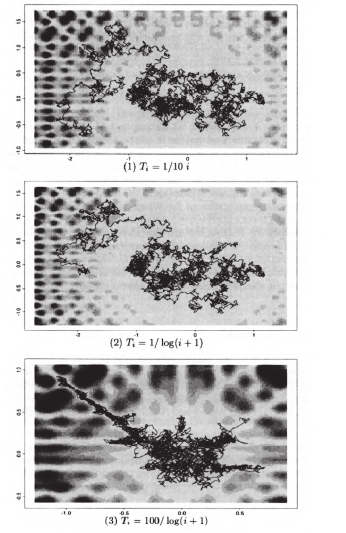

As illustrated by Fig.5 and Table 5.2, the results change with the rate of decrease of the temperature $ T $. Case 3 leads to a very interesting exploration of the valleys of $ h $ on both sides of the central zone. Since the theory (Duflo, 1996) states that rates of the form $ \gamma / \log(i+1) $ are satisfactory for large $ i $, this shows that $ i = 100 $ should be acceptable.

Note also the behavior of the acceptance rate in Table 5.2 for Step 2 in algorithm [A.19]. This is indicative of a rule we will discuss further in Chapter 7 with **Metropolis-Hastings algorithms**, namely that superior performances are not always associated with higher acceptance rates.

---

###  Prior Feedback

Another approach to the maximization problem (5.1) is based on the result of Hwang (1980) of convergence (in $ T $) of the so-called **Gibbs measure** $ \exp(h(\theta) / T) $ (see Section 5.5.3) to the uniform distribution on the set of global maxima of $ h $. This approach, called **recursive integration** or **prior feedback** in Robert (1993) (see also Robert and Soubiran 1993), is based on the following convergence result.

---

### Theorem 5.10

Consider $ h $ a real-valued function defined on a closed and bounded set $ \Theta \subset \mathbb{R}^p $. If there exists a unique solution $ \theta $ satisfying

$$
\arg \max_{\theta \in \Theta} h(\theta),
$$

then

$$
\lim_{T \to \infty} \int_{\Theta} \exp\left( \frac{h(\theta)}{T} \right) d\theta = \int_{\Theta_0} \exp(h(\theta)) d\theta,
$$

where $ \Theta_0 $ is the set of global maxima of $ h $, provided that $ h $ is continuous at $ \Theta_0 $.

---

For a proof, see Problem 5.6. More details can be found in Pincus (1968) (see also Robert 1993 for the case of exponential families and Duflo 1996, pp. 264-271).


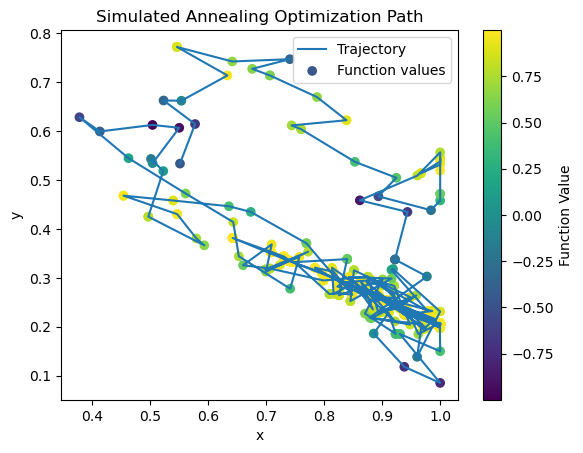

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import math

# Example function to maximize
def h(x, y):
    return np.sin(10 * x) * np.cos(20 * y) + np.cos(10 * x) * np.sin(20 * y)

# Gradient of the function (for potential use in methods like gradient descent)
def gradient_h(x, y):
    grad_x = 10 * np.cos(10 * x) * np.cos(20 * y) - 20 * np.sin(10 * x) * np.sin(20 * y)
    grad_y = -10 * np.sin(10 * x) * np.sin(20 * y) + 20 * np.cos(10 * x) * np.cos(20 * y)
    return grad_x, grad_y
def simulated_annealing(func, x_init, y_init, T_init, T_min, alpha, max_iter):
    x, y = x_init, y_init
    T = T_init
    history = []

    for i in range(max_iter):
        # Propose new states (perturb current state by a small random amount)
        new_x = x + np.random.uniform(-0.1, 0.1)
        new_y = y + np.random.uniform(-0.1, 0.1)

        # Ensure that the new state is within the boundary [0, 1]
        new_x = np.clip(new_x, 0, 1)
        new_y = np.clip(new_y, 0, 1)

        # Calculate the change in the function value
        delta_E = func(new_x, new_y) - func(x, y)

        # Accept the new state with Metropolis criterion
        if delta_E > 0 or np.random.rand() < np.exp(delta_E / T):
            x, y = new_x, new_y

        history.append((x, y, func(x, y)))

        # Decrease temperature according to the cooling schedule
        T = alpha * T
        if T < T_min:
            break

    return history

# Parameters for the simulated annealing
x_init, y_init = 0.5, 0.5
T_init = 1.0
T_min = 1e-6
alpha = 0.99
max_iter = 1000

# Run simulated annealing
history = simulated_annealing(h, x_init, y_init, T_init, T_min, alpha, max_iter)

# Plot the optimization trajectory
history = np.array(history)
plt.plot(history[:, 0], history[:, 1], label='Trajectory')
plt.scatter(history[:, 0], history[:, 1], c=history[:, 2], cmap='viridis', label='Function values')
plt.colorbar(label='Function Value')
plt.title("Simulated Annealing Optimization Path")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()


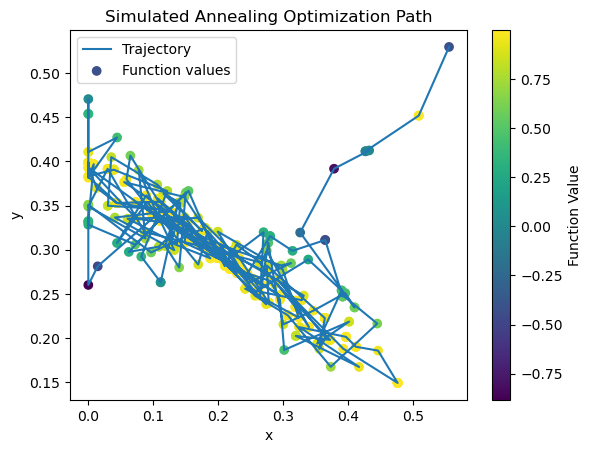

In [8]:
import random
import math
import matplotlib.pyplot as plt

# Example function to maximize
def h(x, y):
    return math.sin(10 * x) * math.cos(20 * y) + math.cos(10 * x) * math.sin(20 * y)

# Gradient of the function (for potential use in methods like gradient descent)
def gradient_h(x, y):
    grad_x = 10 * math.cos(10 * x) * math.cos(20 * y) - 20 * math.sin(10 * x) * math.sin(20 * y)
    grad_y = -10 * math.sin(10 * x) * math.sin(20 * y) + 20 * math.cos(10 * x) * math.cos(20 * y)
    return grad_x, grad_y
def simulated_annealing(func, x_init, y_init, T_init, T_min, alpha, max_iter):
    x, y = x_init, y_init
    T = T_init
    history = []

    for i in range(max_iter):
        # Propose new states (perturb current state by a small random amount)
        new_x = x + random.uniform(-0.1, 0.1)
        new_y = y + random.uniform(-0.1, 0.1)

        # Ensure that the new state is within the boundary [0, 1]
        new_x = max(0, min(1, new_x))
        new_y = max(0, min(1, new_y))

        # Calculate the change in the function value
        delta_E = func(new_x, new_y) - func(x, y)

        # Accept the new state with Metropolis criterion
        if delta_E > 0 or random.random() < math.exp(delta_E / T):
            x, y = new_x, new_y

        history.append((x, y, func(x, y)))

        # Decrease temperature according to the cooling schedule
        T = alpha * T
        if T < T_min:
            break

    return history

# Parameters for the simulated annealing
x_init, y_init = 0.5, 0.5
T_init = 1.0
T_min = 1e-6
alpha = 0.99
max_iter = 1000

# Run simulated annealing
history = simulated_annealing(h, x_init, y_init, T_init, T_min, alpha, max_iter)

# Plot the optimization trajectory
history_x = [point[0] for point in history]
history_y = [point[1] for point in history]
history_values = [point[2] for point in history]

plt.plot(history_x, history_y, label='Trajectory')
plt.scatter(history_x, history_y, c=history_values, cmap='viridis', label='Function values')
plt.colorbar(label='Function Value')
plt.title("Simulated Annealing Optimization Path")
plt.xlabel('x')
plt.ylabel('y')
plt.legend()
plt.show()
